In [1]:
%display latex

# Mean of a random variable

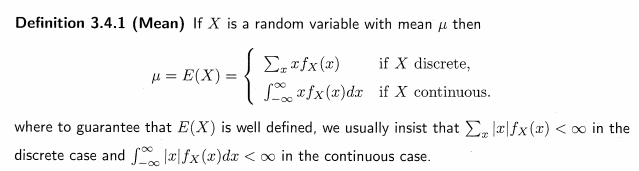

E.g. Mean of a binomial:

Define pmf of a binomial:

In [2]:
p, n = var('p n')
f(x) = binomial(n, x) * p^x * (1 - p)^(n-x)
f

x |--> p^x*(-p + 1)^(n - x)*binomial(n, x)

By definition of an expectation:

In [3]:
sum(x * f(x), x, 0, n)

n*p

E.g. Mean of an exponential distribution:

Define pdf of an exponential distribution:

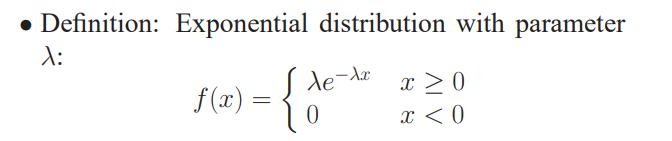

In [4]:
l = var('l', latex_name='\\lambda')
f(x) = l * exp(-l * x)
f

x |--> l*e^(-l*x)

By definition of an expectation:

In [5]:
assume(l > 0)
integrate(x * f(x), x, 0, oo)

1/l

In [6]:
assumptions()

[l > 0]

In [7]:
forget()
assumptions()

[]

# Variance of a random variable

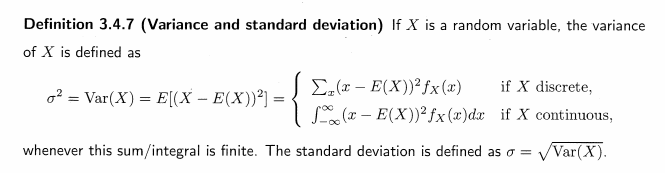

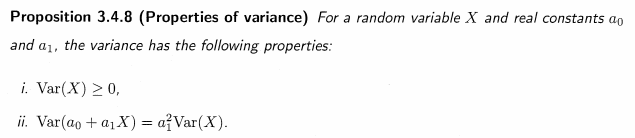

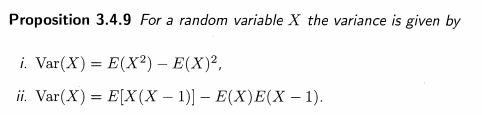

E.g. Variance of a binomial:

In [8]:
n, p = var('n p')
E(x) = n * p

In [9]:
(E(x^2) - (E(x))^2).factor()

-(n*p - 1)*n*p

# Moments

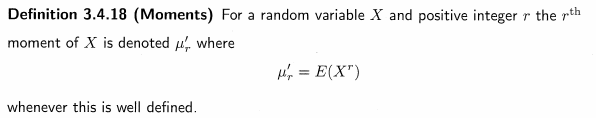

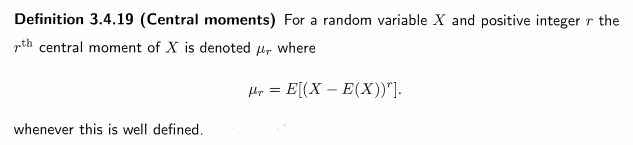

# Moment Generating Function

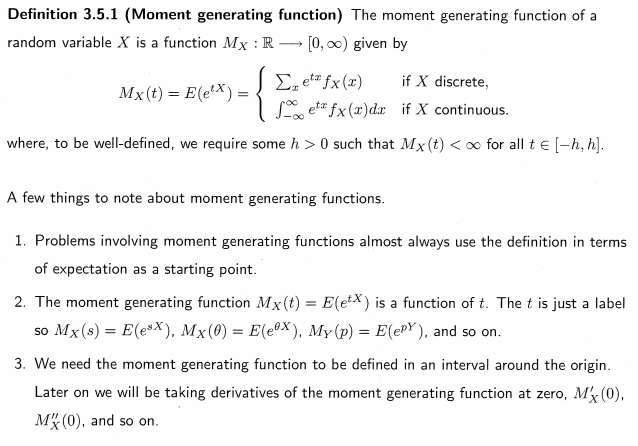

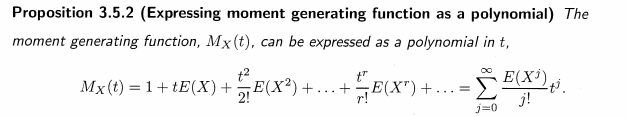

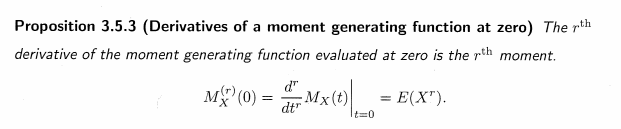

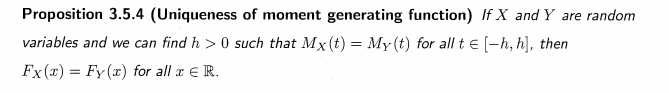

E.g. mean and variance of a poisson distribution:

Define the mgf of a poisson distribution (see [here](https://en.wikipedia.org/wiki/Poisson_distribution)):

In [10]:
M(t) = exp(l * (exp(t) - 1))
M

t |--> e^(l*(e^t - 1))

The mean:

In [11]:
diff(M(t), t).subs({t: 0})

l

The variance:

In [12]:
(diff(M(t), t, 2).subs({t: 0}) - (diff(M(t), t).subs({t: 0}))^2).expand()

l

# Cumulant generating function

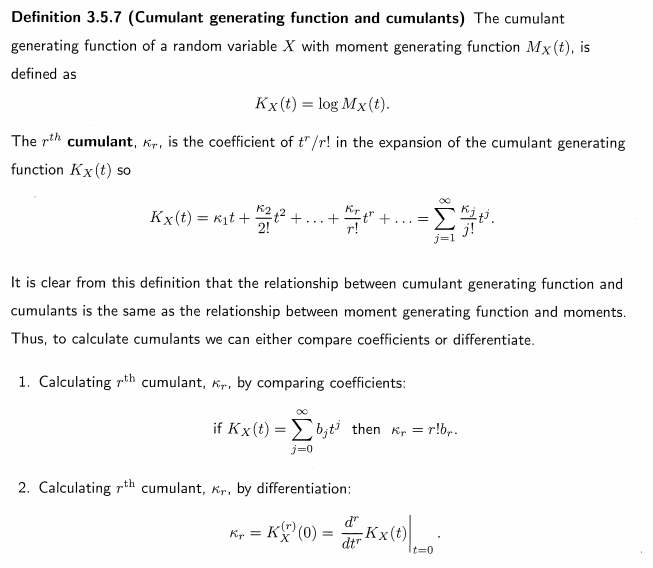

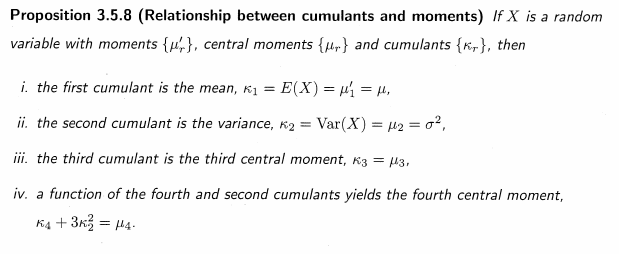

cgf of a standard normal:

Get the pdf of a standard normal:

In [13]:
from sympy.stats import density, Normal

In [14]:
X = Normal('X', 0, 1)
X

X

Define the mgf of a standard normal:

In [15]:
t = var('t')

In [16]:
f(x) = density(X)(x)._sage_()

In [17]:
expr = exp(x * t) * f(x)
M(t) = integrate(expr, x, -oo, oo)
M

t |--> e^(1/2*t^2)

Now we can define the cgf:

In [18]:
K(t) = log(M(t)).full_simplify()
K

t |--> 1/2*t^2

The mean using cgf:

In [19]:
diff(K(t), t).subs({t:0})

0

The variance using cgf:

In [20]:
diff(K(t), t, 2).subs({t:0})

1

# Density for continous distributions

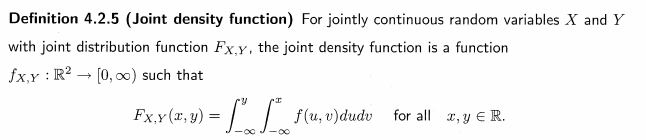

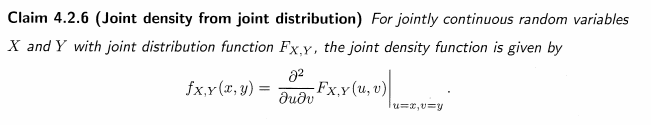

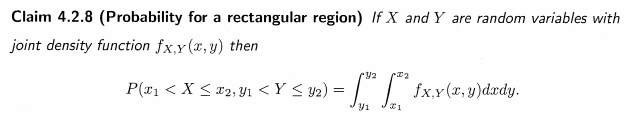

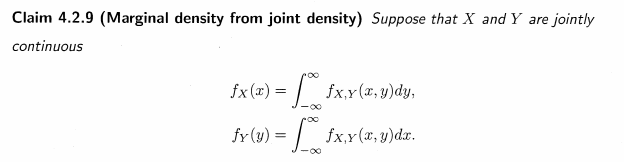

**Sample Question 1**:

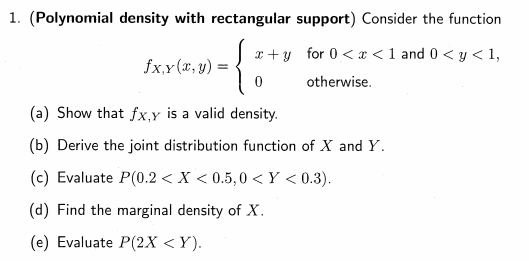

(a)

The funciton is positive:

In [21]:
x, y = var('x y')
assume(x > 0)
assume(y > 0)

bool(x + y > 0)

True

In [22]:
forget()

The function integrates to 1:

In [23]:
x, y = var('x y')
f(x, y) = x + y

integrate(f(x, y), x, 0, 1).integrate(y, 0, 1)

1

In [24]:
integrate(f(x, y), y, 0, 1).integrate(x, 0, 1)

1

(b)

Distribution i.e. cdf of the joint of X and Y:

In [25]:
integrate(f(x, y), y, 0, y).integrate(x, 0, x)

1/2*x^2*y + 1/2*x*y^2

remember that the domain is still the same ie:

$$0 < x < 1 \quad \text{and} \quad 0 < y < 1$$

Note that if $y > 1$ and $0 < x < 1$, the joint distribution of X and Y becomes:

In [26]:
integrate(f(x, y), y, 0, y).integrate(x, 0, x).substitute(y == 1)

1/2*x^2 + 1/2*x

Similarly for $0 < y < 1$ amd $x > 1$.

(c):

In [27]:
f(x, y).integrate(x, 0.2, 0.5).integrate(y, 0, 0.3)

0.045

In [28]:
f(x, y).integrate(y, 0, 0.3).integrate(x, 0.2, 0.5)

0.045

(d)

In [29]:
f(x, y).integrate(y, 0, 1)

x + 1/2

(e)

Define all known inequalities:

In [30]:
ineq1 = 0 < x
ineq2 = x < 1
ineq3 = 0 < y
ineq4 = y < 1
ineq5 = 2 * x < y

Figure out the correct ranges to integrate:

In [31]:
sys_ineq = [ineq1, ineq2, ineq3, ineq4, ineq5]
solve(sys_ineq, [x, y])

[[0 < x, x < 1/2*y, 0 < y, y < 1]]

In [32]:
f(x, y).integrate(x, 0, 1/2 * y).integrate(y, 0, 1)

5/24

**Sample Question 2**

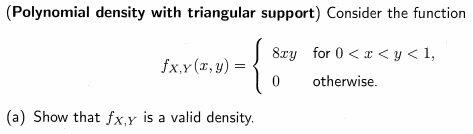

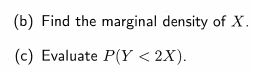

(a):

In [33]:
x, y = var('x, y')

In [34]:
bool(8 * x * y > 0)

False

In [35]:
assume(0 < x, x < y, y < 1)
bool(8 * x * y > 0)

True

In [36]:
forget()

In [37]:
f(x, y) = 8 * x * y
f(x, y).integrate(x, 0, y).integrate(y, 0, 1)

1

(b)

In [38]:
f(x, y).integrate(y, x, 1)

-4*(x^2 - 1)*x

(c)

In [39]:
ineq1 = 0 < x
ineq2 = x < y
ineq3 = y < 1
ineq4 = y < 2 * x
sys_ineq = [ineq1, ineq2, ineq3, ineq4]
solve(sys_ineq, [x, y])

[[1/2*y < x, x < y, 0 < y, y < 1]]

In [40]:
f(x, y).integrate(x, 1/2 * y, y).integrate(y, 0, 1)

3/4

# Covariance and Correlation

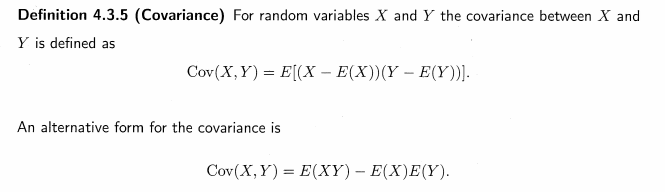

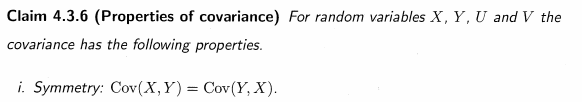

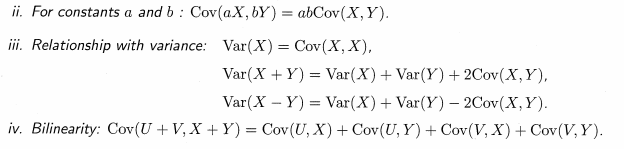

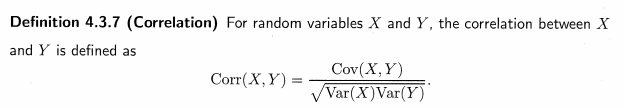

# Joint Moments

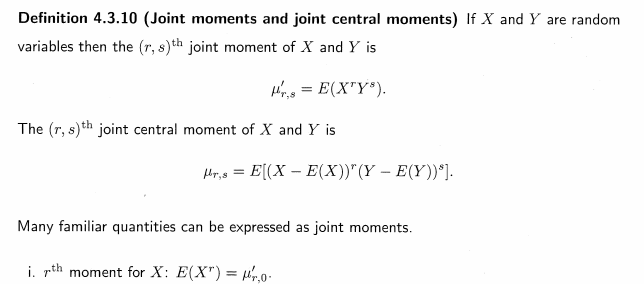

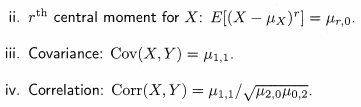

# Joint MGF

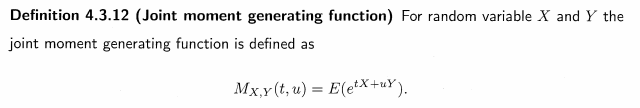

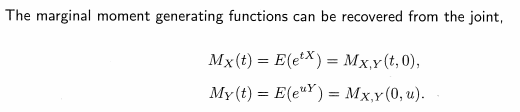

# Conditional Density

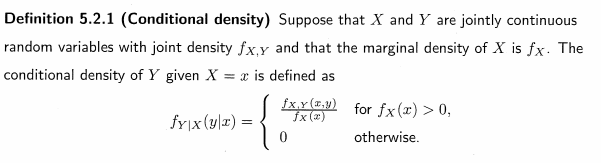

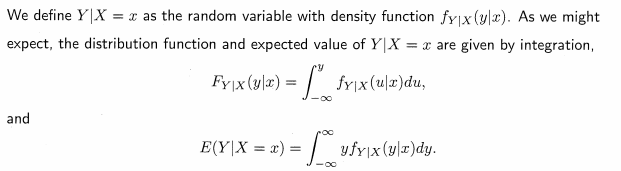

# Scratch

In [41]:
t = var('t')
M(t) = exp(2 * (exp(t) - 1))
M

t |--> e^(2*e^t - 2)

In [42]:
diff(M(t), t).subs(t=0)

2